<a href="https://colab.research.google.com/github/nowickimichal/gestures_and_author_classification/blob/main/gesture_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!! pip install scikit-learn --upgrade

['Requirement already satisfied: scikit-learn in /usr/local/lib/python3.7/dist-packages (1.0.1)',
 'Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.7/dist-packages (from scikit-learn) (3.0.0)',
 'Requirement already satisfied: scipy>=1.1.0 in /usr/local/lib/python3.7/dist-packages (from scikit-learn) (1.4.1)',
 'Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.7/dist-packages (from scikit-learn) (1.1.0)',
 'Requirement already satisfied: numpy>=1.14.6 in /usr/local/lib/python3.7/dist-packages (from scikit-learn) (1.19.5)']

In [2]:
import os
import xml.dom.minidom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import time
from sklearn.tree._classes import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm._classes import SVC,LinearSVC
from sklearn.svm import SVC, NuSVC 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV,SGDClassifier,Perceptron,PassiveAggressiveClassifier,LogisticRegressionCV,LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn import tree
from scipy import signal
from google.colab import drive
import warnings

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Wczytanie bazy utworzenie zbiorów uczących i testowych oraz zastosowanie PCA

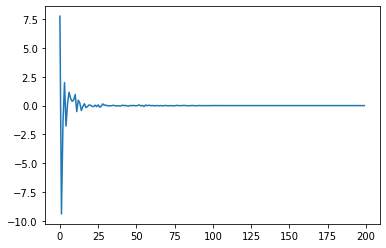

In [4]:
path='/content/gdrive/MyDrive/master_thesis_data/'

df = pd.read_csv(path+'gesture_data.csv',index_col=0)

data=df.drop('0Y',axis=1)
df_feat = pd.DataFrame(data,columns=df.columns[1:])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,df['0Y'],test_size=0.30,stratify=df['0Y'])


pca=PCA(200)
pca.fit(X_train)

X_train = pca.transform(X_train)



plt.plot(X_train[0,:])
X_test = pca.transform(X_test)




Import niemal wszystkich klasyfikatorów z biblioteki sklearn

In [5]:
clfs=[AdaBoostClassifier,BernoulliNB, DecisionTreeClassifier, ExtraTreeClassifier,
ExtraTreesClassifier, GaussianNB, GaussianProcessClassifier, KNeighborsClassifier, 
LinearSVC, LogisticRegression, MLPClassifier, NuSVC, PassiveAggressiveClassifier,
Perceptron, RandomForestClassifier, RidgeClassifier, SGDClassifier,SVC]

clfsCV=[RidgeClassifierCV, LogisticRegressionCV]

params=[{"n_estimators":[1,10,50,100]}, {"alpha":[0.1,0.5,1,2,10,100]},
        {"max_depth": [3, None]},{"max_depth": [3, None]},
        {"max_depth": [3, None]},{"var_smoothing": [0.001,0.0000001,0,0.000000001]},
        {"max_iter_predict":[1,10,50,100]},{"n_neighbors":[1,3,5]},
        {"C":[0.1,0.5,1,2,10,100]},{"C":[0.1,0.5,1,2,10,100]},
        {"alpha":[0.1,0.5,1,2,10,100]},{"nu":[0.1,0.2,0.5,0.7,0.99]},
        {"C":[0.1,0.5,1,2,10,100]},{"alpha":[0.1,0.5,1,2,10,100]},
        {"n_estimators":[1,10,100,1000]},{"alpha":[0.1,0.5,1,2,10,100]},
        {"alpha":[0.1,0.5,1,2,10,100]},{"C":[0.1,0.5,1,2,10,100]}
        ]

Poniższy kod dokonuje klasyfikacji zbiorów jednakże wyświetlane są wyniki tylko dla klasyfikatorów osiągających f1_score powyżej danego progu (w tym przykładzie 0.7).

AdaBoostClassifier
{'n_estimators': 10}
                   precision    recall  f1-score   support

            arrow       0.02      0.02      0.02        99
            caret       0.00      0.00      0.00        99
            check       0.00      0.00      0.00        99
           circle       0.00      0.00      0.00        99
      delete_mark       0.07      1.00      0.13        99
 left_curly_brace       0.00      0.00      0.00        99
  left_sq_bracket       0.00      0.00      0.00        99
          pigtail       0.00      0.00      0.00        99
    question_mark       0.00      0.00      0.00        99
        rectangle       0.00      0.00      0.00        99
right_curly_brace       0.00      0.00      0.00        99
 right_sq_bracket       0.00      0.00      0.00        99
             star       1.00      0.01      0.02        99
         triangle       0.00      0.00      0.00        99
                v       0.00      0.00      0.00        99
               

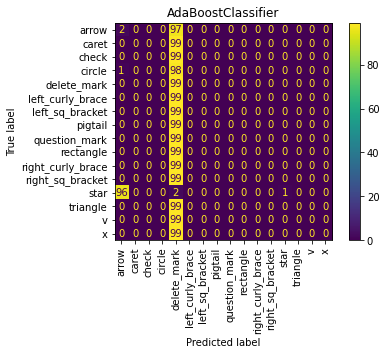

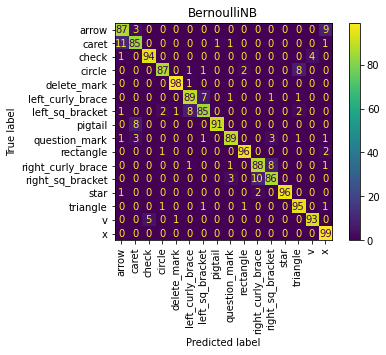

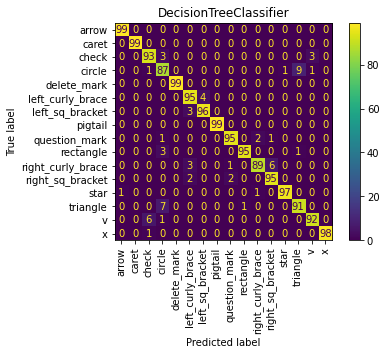

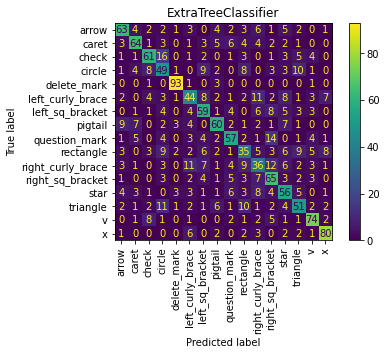

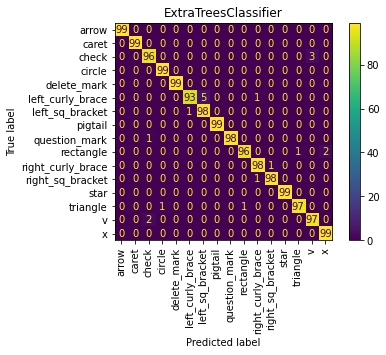

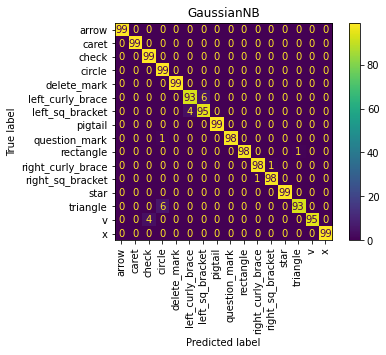

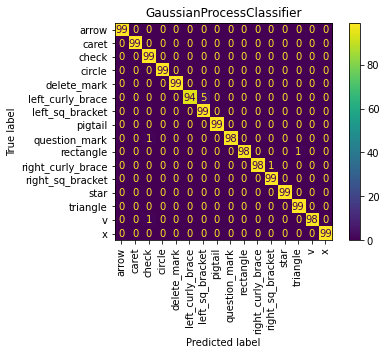

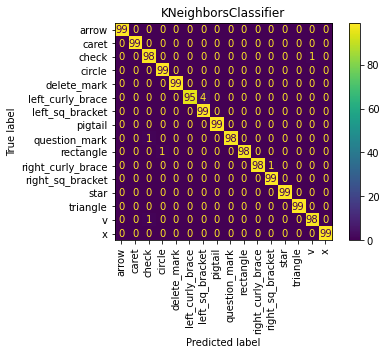

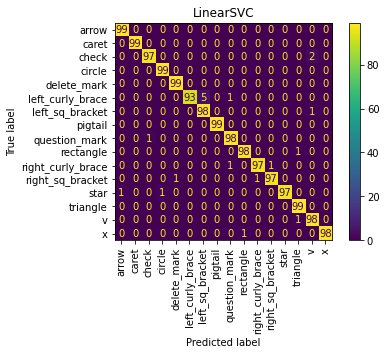

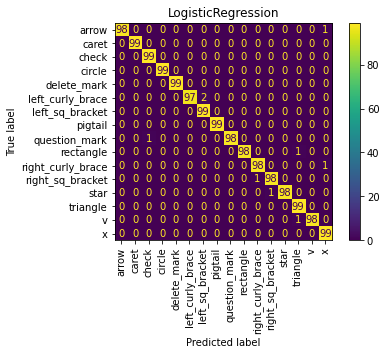

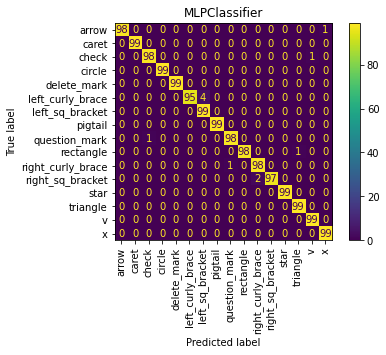

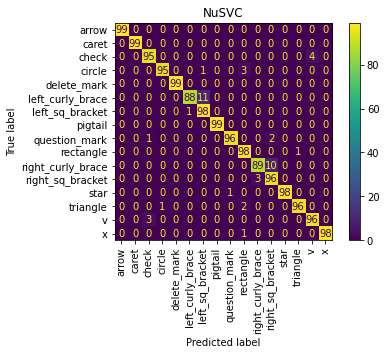

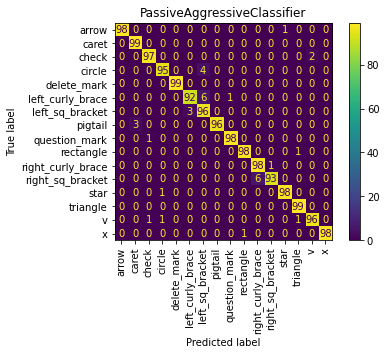

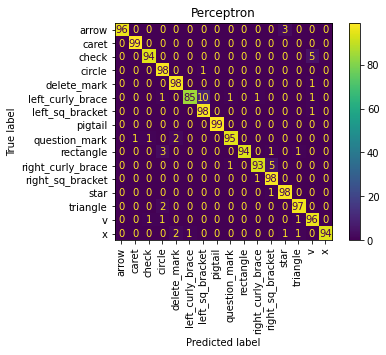

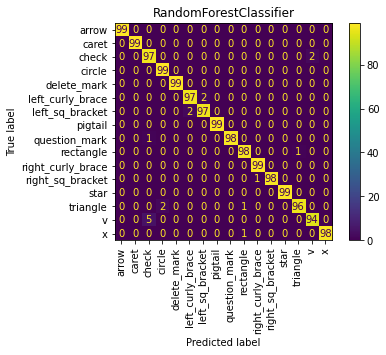

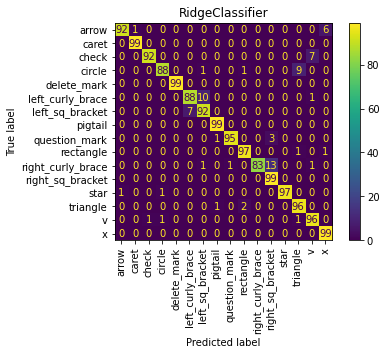

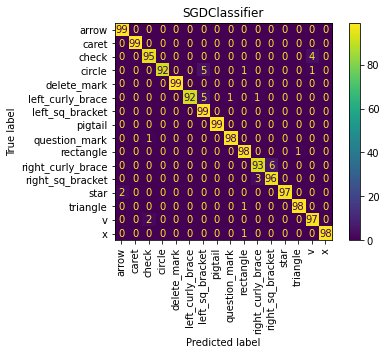

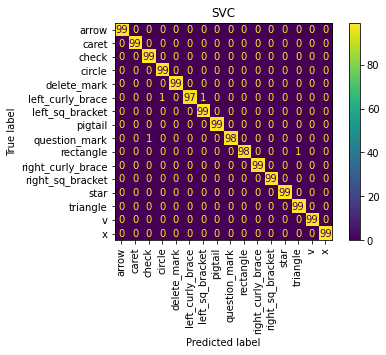

In [12]:
i=0
for model in clfs:
  warnings.filterwarnings("ignore")
  param_distributions = params[i]
  i=i+1
  clf = HalvingRandomSearchCV(model(), param_distributions).fit(X_train,y_train)
  clf.fit(X_train,y_train) 
  pred = clf.predict(X_test)
  x=str(model)
  dot=x.find('.')
  x=x[dot+1:]
  dot=x.find('.')
  x=x[dot+1:]
  dot=x.find('.')
  x=x[dot+1:-2]
  print(x)
  print(clf.best_params_)
  print(classification_report(y_test,pred))
  titles_options = [x]
  for title in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,xticks_rotation='vertical')  
    disp.ax_.set_title(title)

 # plot_confusion_matrix(clf, X_test, y_test,xticks_rotation='vertical') 